# This Notebook is for EDA and Clean-up of the provided data set for the Machine Learning course

## Set Up

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import os
import warnings

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SkLearn Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# set Theme
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [2]:
# Get Main Data
path = os.getcwd()
path = path +'\\medical_data\\'
file = 'data.csv'

mainData = pd.read_csv(path+file)
mainData.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
1,29758806,378,Caucasian,Female,[50-60),NaN,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
2,189899286,729,Caucasian,Female,[80-90),NaN,1,3,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
3,64331490,774,Caucasian,Female,[80-90),NaN,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
4,14824206,927,AfricanAmerican,Female,[30-40),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,NO


In [3]:
# Get Admission Type Look-Up
file = 'id_lookup.csv'
admissionTypeLookUp = pd.read_csv(path+file)
admissionTypeLookUp = admissionTypeLookUp.iloc[:8]
admissionTypeLookUp['admission_type_id'] = admissionTypeLookUp['admission_type_id'].astype(int)
admissionTypeLookUp

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [4]:
# Set Aside Copy of DF for Experimnets
expData = mainData

## Re-Usable Functions

In [5]:
def OrdinalEncoderFunc (df,listOfVars,order):
    df=df
    order=order
    enc = OrdinalEncoder(categories=[order])
    for col in listOfVars:
        col=col
        df[col] = enc.fit_transform(df[[col]])
    return df

In [6]:
def nullAnalysis2(df):
    row = []
    null_summaryDF = pd.DataFrame(columns = ["Variable","Observations","Nulls","Null_Per","Num_Unique","Type"])
    for column in df:
        var = column
        countOfObs = len(df[var])
        countOfNull = df[var].isnull().sum()
        perOfNull = round((100 * countOfNull) / countOfObs,3)
        numUnique = df[var].nunique()
        type  = df[var].dtypes
        # Append to Summary DF
        row = [var, countOfObs,countOfNull,perOfNull,numUnique,type]
        df_length = len(null_summaryDF)
        null_summaryDF.loc[df_length] = row
    # Get Summary Stats
    countofVars = len(null_summaryDF)
    countofNotNull = (null_summaryDF['Nulls'] == 0).sum()
    countofNull = (null_summaryDF['Nulls'] != 0).sum()
    print(f"Count of Variables:",countofVars)
    print(f"Count of Variables without nulls:",countofNotNull)
    print(f"Count of Variables with null :",countofNull)
    # Format Summary
    summaryDF = null_summaryDF[null_summaryDF['Nulls'] != 0].sort_values(by=['Nulls'],ascending=False)
    return summaryDF

## EDA


In [7]:
# Data Shape
mainData.shape

(71518, 50)

In [8]:
# Check Nulls
print("Count Of Nulls:")
mainData.isna().sum()

Count Of Nulls:


encounter_id                    0
patient_nbr                     0
race                         1948
gender                          0
age                             0
weight                      68665
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# Check data types
mainData.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
mainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      69570 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    2853 non-null   object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                40475 non-null  object
 11  medical_specialty         37041 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications       

In [11]:
# Describe
mainData.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
count,7.151800e+04,7.151800e+04,69570,71518,71518,2853,71518.000000,71518.000000,71518.000000,71518.00000,...,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518
unique,NaN,NaN,5,3,10,9,NaN,NaN,NaN,NaN,...,1,4,4,2,1,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,53491,38025,18210,1195,NaN,NaN,NaN,NaN,...,71518,34921,71016,71511,71518,71516,71517,39494,54319,42985
mean,1.568156e+08,5.505160e+07,NaN,NaN,NaN,NaN,2.100254,3.593235,5.657457,4.28913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.003769e+08,3.947573e+07,NaN,NaN,NaN,NaN,1.508301,5.269771,4.162580,2.94921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.145807e+07,2.337577e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.440574e+08,4.816680e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,3.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.155513e+08,8.752222e+07,NaN,NaN,NaN,NaN,3.000000,3.000000,7.000000,6.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mainData['payer_code'].value_counts(dropna=False)
#mainData['medical_specialty'].value_counts(dropna=False)

NaN    31043
MC     20414
HM      4022
BC      3432
SP      3347
MD      2197
CP      1986
UN      1879
CM      1334
OG       658
PO       463
DM       374
WC       117
CH       117
OT        65
SI        37
MP        32
FR         1
Name: payer_code, dtype: int64

In [13]:
numericFeatures = mainData.select_dtypes(include= np.number)
numericFeatures =  numericFeatures.drop(columns=['encounter_id','patient_nbr'])

In [14]:
numericFeatures.nunique()

admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
num_lab_procedures          116
num_procedures                7
num_medications              75
number_outpatient            33
number_emergency             18
number_inpatient             13
number_diagnoses             16
dtype: int64

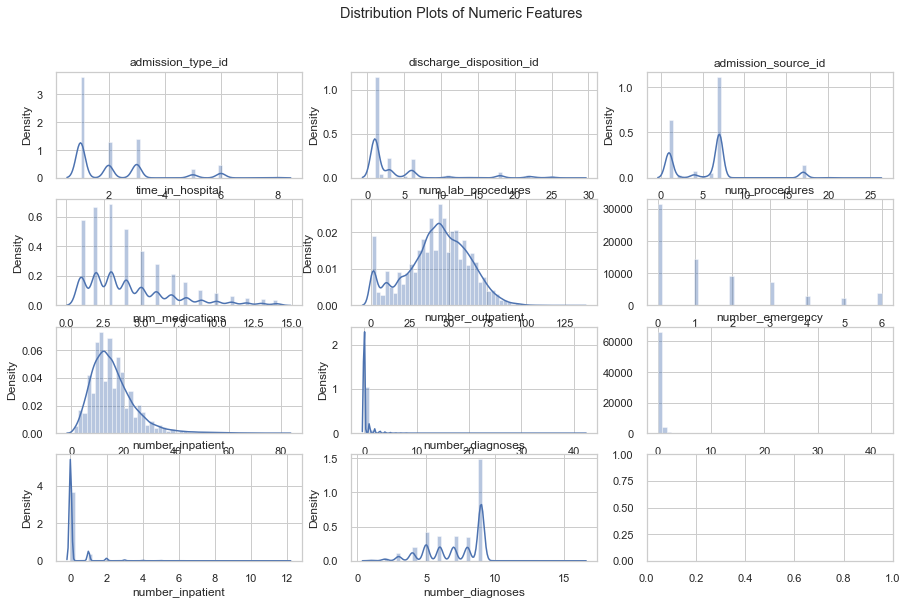

In [15]:
# Distribution Plots

fig, axes = plt.subplots(4,3, sharex=False, sharey=False, figsize=(15,9))
fig.suptitle('Distribution Plots of Numeric Features')

sns.distplot(numericFeatures['admission_type_id'], ax=axes[0,0], kde=True).set(title='admission_type_id')
sns.distplot(numericFeatures['discharge_disposition_id'], ax=axes[0,1], kde=True).set(title='discharge_disposition_id')
sns.distplot(numericFeatures['admission_source_id'], ax=axes[0,2], kde=True).set(title='admission_source_id')
sns.distplot(numericFeatures['time_in_hospital'], ax=axes[1,0], kde=True).set(title='time_in_hospital')
sns.distplot(numericFeatures['num_lab_procedures'], ax=axes[1,1], kde=True).set(title='num_lab_procedures')
sns.distplot(numericFeatures['num_procedures'], ax=axes[1,2], kde=False).set(title='num_procedures')
sns.distplot(numericFeatures['num_medications'], ax=axes[2,0], kde=True).set(title='num_medications')
sns.distplot(numericFeatures['number_outpatient'], ax=axes[2,1], kde=True).set(title='number_outpatient')
sns.distplot(numericFeatures['number_emergency'], ax=axes[2,2], kde=False).set(title='number_emergency')
sns.distplot(numericFeatures['number_inpatient'], ax=axes[3,0], kde=True).set(title='number_inpatient')
sns.distplot(numericFeatures['number_diagnoses'], ax=axes[3,1], kde=True).set(title='number_diagnoses')

plt.show()

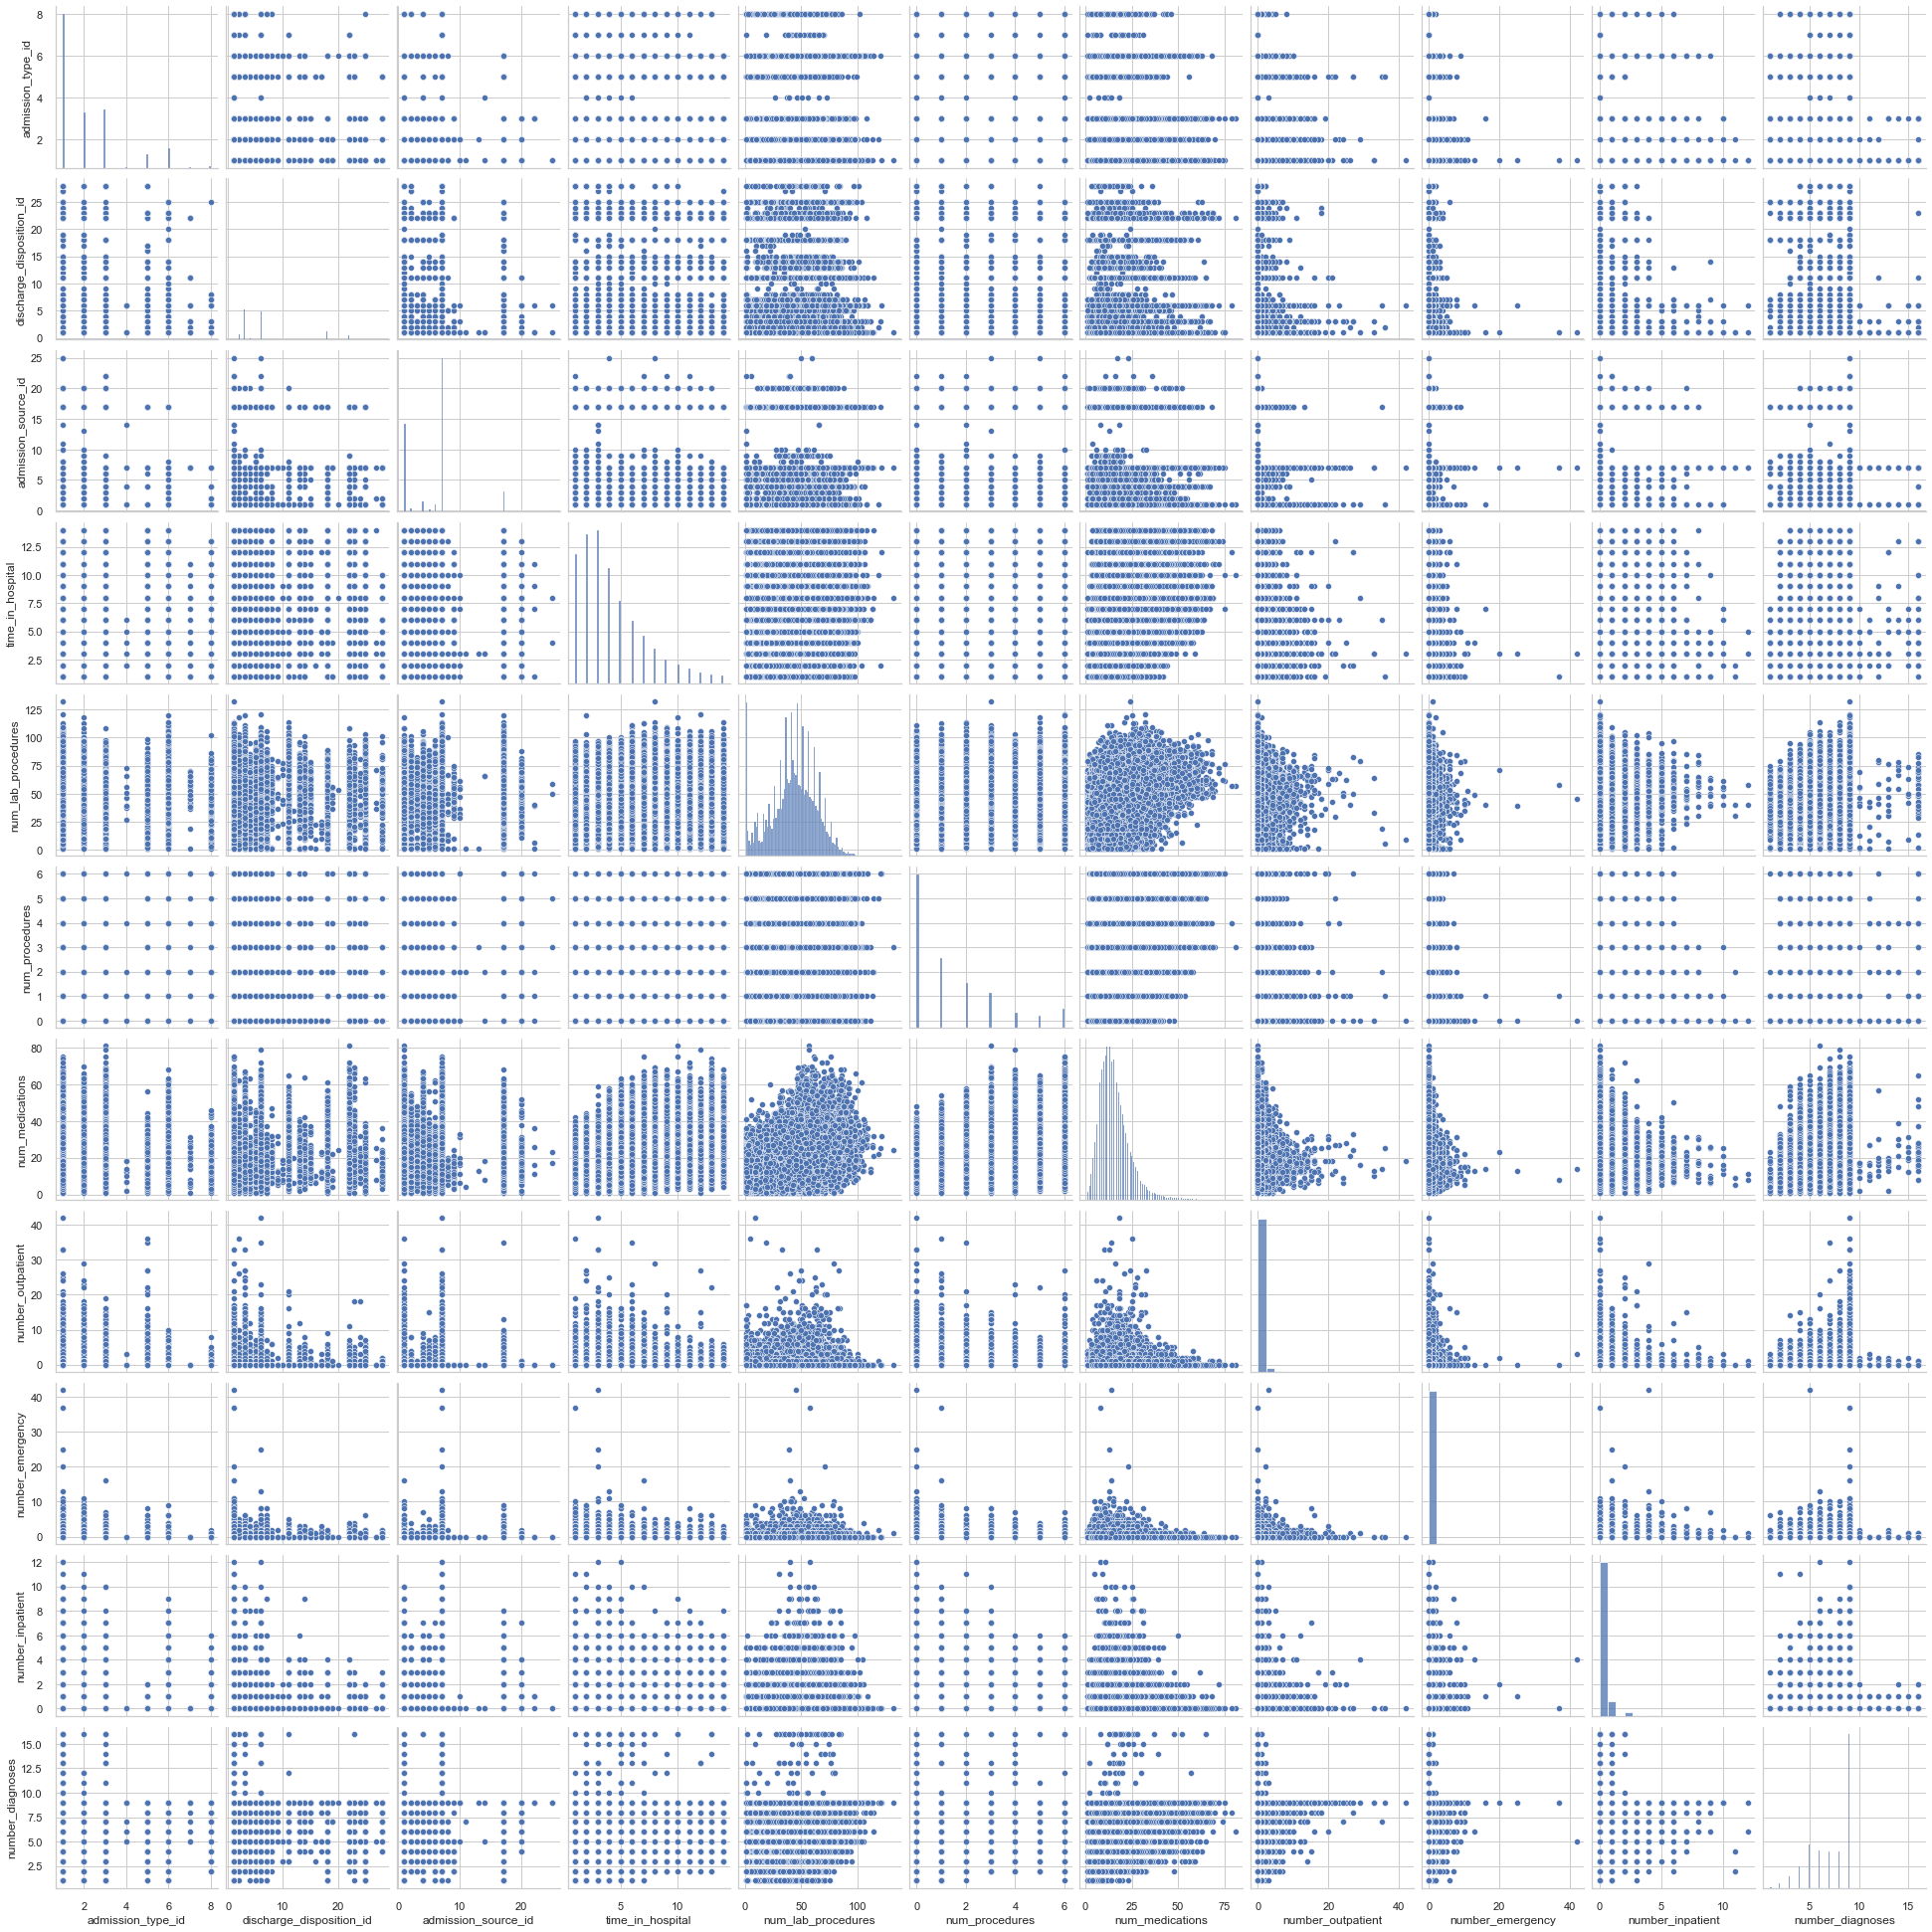

In [16]:
sns.pairplot(numericFeatures)

## Data Clean-Up

In [17]:
#TODO: Improve handling of rows with nulls

In [18]:
# Print Null Summary
nullSummary = nullAnalysis2(mainData)
nullSummary


Count of Variables: 50
Count of Variables without nulls: 43
Count of Variables with null : 7


,Variable,Observations,Nulls,Null_Per,Num_Unique,Type
5,weight,71518,68665,96.011,9,object
11,medical_specialty,71518,34477,48.207,70,object
10,payer_code,71518,31043,43.406,17,object
2,race,71518,1948,2.724,5,object
20,diag_3,71518,1225,1.713,758,object
19,diag_2,71518,294,0.411,725,object
18,diag_1,71518,11,0.015,696,object


In [19]:
# Null Clean-Up1 -- Fillna's for variables with nulls that have value to keep
mainData[['medical_specialty','race']] = mainData[['medical_specialty','race']].fillna('Unknown',inplace=True)

# Null Clean-Up2 -- Drop Columns with high % of nulls, that aren't worth filling
mainData = mainData.drop(columns=['weight','payer_code'],inplace=True)

# Null Clean-Up3 -- admission_type_value has a value for "Not Available" move nulls to that value
# mainData['admission_type_value'] = mainData['admission_type_value'].fillna('Not Available')

In [20]:
mainData['medical_specialty'].value_counts()

TypeError: 'NoneType' object is not subscriptable

# Diag Clean-Up
## If diag_2 is null, then use diag_3.  If diag_1 is null, then use diag_2
## Solves all but 1 null Diag1, which is dropped
## TODO: Determine how to drop value from column that I pull from.
mainData['diag_2'] = mainData['diag_2'].fillna(mainData['diag_3'],inplace=True)
mainData['diag_1'] = mainData['diag_1'].fillna(mainData['diag_2'], inplace=True)
mainData = mainData.dropna(subset=['diag_1'])

In [21]:
# Ordinal Encode Medication Variables

## Set List of Variabales
medCols = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
            'citoglipton','insulin','glyburide.metformin','glipizide.metformin','glimepiride.pioglitazone',
            'metformin.rosiglitazone','metformin.pioglitazone'] #Note: 'README' states 'sitagliptin' but not in data

## Define Func Params
df=mainData
listOfVars = medCols
order = ['No','Down','Steady','Up']

## Execute
mainData  = OrdinalEncoderFunc(df,listOfVars,order)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
medCols

In [ ]:
# Add Variable For Number of Medications

mainData.insert(47,"num_of_meds", 0)
mainData['num_of_meds'] = mainData[medCols].ne(0).sum(axis=1)

In [ ]:
# Add Variable for Medication Level Up Or Down

## In the Medication columns 1 signifies that dosage decreased, 3 signifies that dosage increased
## This counts the number of 1 and coverts to a negative, then the adds the number of 3
## Result indicates the net level of medication change

mainData.insert(48,"med_level_direction", 0)
mainData['med_level_direction'] = ((mainData[medCols] == 1).sum(axis=1)*-1) + \
                                  (mainData[medCols] == 3).sum(axis=1)

In [ ]:
#mainData['A1Cresult'].value_counts(dropna=False)
#mainData['max_glu_serum'].value_counts(dropna=False)
mainData['readmitted'].value_counts(ascending=False)

In [ ]:
# TODO: Additional Ordinal Encoding

## 'A1Cresult'
### A blood sugar test with possible values of 'None' - test wasn't run (58,531)
### If test is run values are 'Norm' - normal result (3791), '>7' -- Tier1 result (2891), '>8' -- Tier2 result (6304)
#TODO: Determine if ordinal encoding is correct, or if there is another approach
# problem is that 'normal' as a 1 means that it's greater than not running at all.  Which is problematic.

## Define Func Params
df=mainData
listOfVars = ['A1Cresult']
order = ['None','Norm','>7','>8']

## TODO: Execute

## 'max_glu_serum'
### Test that indicates average blood sugar levels with possible values of 'None' - test wasn't run (68,061)
### If test is run values are 'Norm' - normal result (1731),'>200' - Tier1 result (969), '>300' - Tier2 result (756)
#TODO: Determine if ordinal encoding is correct, or if there is another approach
# problem is that 'normal' as a 1 means that it's greater than not running at all.  Which is problematic.

## Define Func Params
listOfVars = ['max_glu_serum']
order = ['None','Norm','>200','>300']

## TODO: Execute

## 'readmitted'
### Indicates if there is a record of the patient being readmitted
### No, <30, >30
#TODO: Likely response variable, determine if I can do this before the test/train split

## Define Func Params
df=mainData
listOfVars = ['readmitted']
order = ['NO','<30','>30']

## TODO: Execute
mainData  = OrdinalEncoderFunc(df,listOfVars,order)

In [ ]:
mainData['readmitted'].value_counts(ascending=False)

## Replace Look-Up Values With Literal Values

In [ ]:
# Add Admission Type Values (Note: Did not drop ID)

# Add Column
mainData.insert(7,"admission_type_value", 0)

# Left Join
mainData = pd.merge(mainData,admissionTypeLookUp,on='admission_type_id')

# Replace Values
mainData['admission_type_value'] = mainData['description']
mainData = mainData.drop(columns=['description'])
mainData.head()

# Experimentation/ Scratchpad

In [ ]:
expData.sample(10)

In [ ]:
# Potential for Ordinal Encoding:
#mainData['A1Cresult'].value_counts(dropna=False)
#mainData['max_glu_serum'].value_counts(dropna=False)
mainData['readmitted'].value_counts(ascending=False)

In [ ]:
#mainData['time_in_hospital'].value_counts(ascending=False)

In [ ]:
corr_matrix = mainData.corr()
corr_matrix['time_in_hospital'].sort_values(ascending=False)

In [ ]:
mainData['age'].value_counts(dropna=False)

In [ ]:
expVars = ['num_of_meds','med_level_','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
            'citoglipton','insulin','glyburide.metformin','glipizide.metformin','glimepiride.pioglitazone',
            'metformin.rosiglitazone','metformin.pioglitazone']


In [ ]:
#Multiple Regressions -- Correlation with output variable
responseVar = 'qt_diff'
cor_target = abs(cor[responseVar])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.05] # Look for Features w/ greater 0.05 cor
relevant_features